# SUPPORT VECTOR MACHINES

Una máquina de soporte vectorial (*Support Vector Machine* SVM) es un modelo poderoso y versátil de Machine Learning, capaz de ejecutar clasificación lineal y no lineal, regresión e incluso detección de valores atípicos. Es uno de los modelos más populares en Machine Learning, y cualquier persona interesada en Machine Learning debería tenerno en su caja de herramientas. Las SVM son particularmente adecuadas para la clasificación de datasets complejos pero de tamaño pequeño o mediano.

Este capítulo explicará los conceptos fundamentales de las SVM, cómo usarlas y cómo funcionan.

# Clasificación SVM lineal

La idea fundamental detrás de las SVM se explica mejor con algunas gráficas. La siguiente gráfica muestra parte del dataset Iris que vimos al final del capítulo 4. Las dos clases se pueden separar claramente con una línea recta (son *linealmente separables*). La gráfica de la izquiera muestra los límites de decisión de tres posibles clasificadores lineales. El modelo cuyo límite de decisión está representado por la línea de rayas es tan malo que no es siquiera capaz de separar las clases adecuadamente. Los otros dos modelos funcionan perfectamente en el conjunto de entrenamiento, pero sus límites de decisión están tan próximos a las instancias que probablemente dichos modelos no se ejecutarán bien en nuevas instancias. Por el contrario, las líneas sólidas de la gráficad de la derecha representan los límites de decisión de un clasificador SVM; esta línea no solo separa las dos clases sino que se encuentra lo más alajada posible de las instancias de entrenamiento más cercanas. Podemos pensar que un clasificador SVM se ajusta a la calle más ancha posible (representada por las líneas paralelas de rayas) entre las clases. Esto se denomina *clasificación de mayor margen*.

In [18]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [19]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

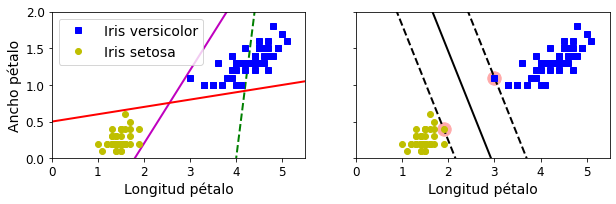

In [20]:
# Modelos malos
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Longitud pétalo", fontsize=14)
plt.ylabel("Ancho pétalo", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Longitud pétalo", fontsize=14)
plt.axis([0, 5.5, 0, 2]);

Observemos que añadir más instancias de entrenamiento "fuera de la calle" no afectará en albsoluto al límite de decisión: está totalmente determinado (o "soportado") por las instancias localizadas en los bordes de la calle. Estas instancias se denominam *vectores de soporte* (son las que están rodeadas por un círculo).

---
Las SVM son sensibles a la escala de las características, como podemos ver en la siguiente gráfica: en la gráfica de la izquierda, la escala vertical es mucho mayor que la escala horizontal, por eso la calle más ancha posible está próxima a la horizontal. Tras el escalado de características (por ejemplo, usando `StandardScaler` de Scikit-Learn), el límite de decisión se muestra mucho mejor (en la gráfica de la derecha).

---

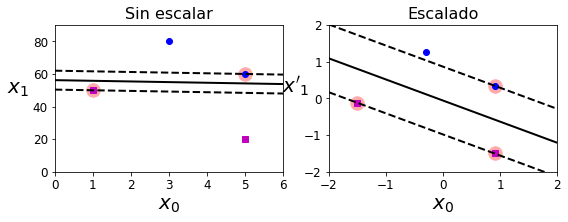

In [21]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Sin escalar", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Escalado", fontsize=16)
plt.axis([-2, 2, -2, 2]);

## Clasificación de marge suave

Si imponemos estrictamente que todoas las instancias estén fuera de la calle y en el lado derecho, esto se denomina *clasificación de margen duro*. Hay dos problemas principales con la clasificación de margen duro. Primero, solo funciona si los datos son linealmente separables y, segundo, es bastante sensible a los valores atípicos. La siguiente figura muestra muestra el dataset Iris con solo un valor atípico adicional: a la izquiera, es imposible encontrar un margen duro y, a la derecha, el límite de decisión termina de forma muy diferente a como vimos en la gráfica anterior sin el valor atípico y probablemente no generalizará tan bien.

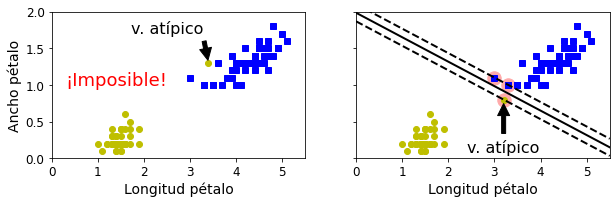

In [22]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "¡Imposible!", fontsize=18, color="red")
plt.xlabel("Longitud pétalo", fontsize=14)
plt.ylabel("Ancho pétalo", fontsize=14)
plt.annotate("v. atípico",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Longitud pétalo", fontsize=14)
plt.annotate("v. atípico",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2]);

Para evitar estos problemas es preferible usar un modelo más flexible. El objetivo es encontrar un buen equilibrio entre mantener la calle tan ancha como sea posible y limitar la *violación del margen* (es decir, instancias que terminan en mitad de la calle o incluso en el lado equivocado). Esto se denomina *clasificación de margen suave*.

En las clases de SVM de Scikit-Learn podemos controlar este equilibrio usando el hiperparámetro `C`: un valor pequeño de `C` nos conduce a calles anchas pero a mas violaciones de margen. La siguiente figura muestra los límites de decisión y márgenes de dos clasificadores SVM de margen suave en un dataset no separable linealmente. A la izquiera, usando un valor bajo de `C` el margen es bastante grande, pero muchas instancias terminan dentro de la calle. A la derecha, usando un valor alto de `C` el clasificador comete menos violaciones de margen pero termina con una margen menor. Sin embargo, parece probable que el primer clasificador generalizará mejor: de hecho, incluso en este conjunto de entrenamiento comete menos errores de predicción, dado que la mayoría de las violaciones de margen están realmente en el lado correcto del límite de decisión.

El siguiente código larga el dataset de Iris, escala las características y luego entrena un modelo SVM lineal (usando la clase `LinearSVC` con `C=1` y la función *hinge loss*) para detectar las flores Iris-Viriginica:

In [23]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

Luego, como es usual, podemos usar el modelo para hacer predicciones:

In [24]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

---
A diferencia de los clasificadores de Regresión Logística, los clasificadores SVM no devuelven probabilidades para cada clase.

---

In [25]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [26]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

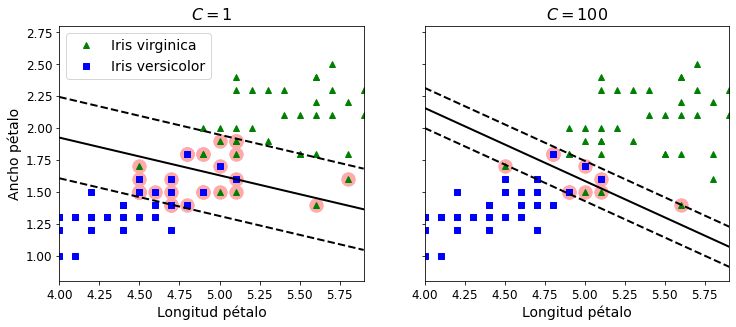

In [27]:
fig, axes = plt.subplots(ncols=2, figsize=(12,4.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Longitud pétalo", fontsize=14)
plt.ylabel("Ancho pétalo", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Longitud pétalo", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8]);

---
Si nuestro modelo SVM está sobreajustado, podemos intentar regularizarlo reduciendo `C`.

---

Alternativamente, podemos usar la clase `SVC`, usando `SVC(kernel="linear", C=1)`, pero es mucho más lento, especialmente con grandes conjuntos de entrenamiento, por lo tanto no es recomendable. Otra opción es usar la clase `SGDClassifier`, con `SGDClassifier(loss="hinge", alpha=1/(m*C))`. Esto aplica Descenso de Gradiente Estocástico para entrenar un clasificador SVM lineal. No converge tan rápido como la clase `LinearSVC`, pero puede ser útil para manejar grandes datasets que no caben en memoria (entrenamiento *out-of-core*) o para manejar tareas de clasificación online.

---
La clase `LinearSVC` regulariza el término de sesgo, por tanto primero deberíamos centrar los datos de entrenamiento restándoles su media. Esto es automático si escalamos los datos usando `StandardScaler`. Además, debemos asegurarnos de establecer el hiperparámetro `loss` a `hinge`, ya que no es el valor predeterminado. Finalmente, para una mejor ejecución debemos establecer el hiperparámetro `dual` a `False`, a menos que existan más características que instancias de entrenamiento (discutiremos la dualidad más adelante en el capítulo).

---

# Clasificación SVM no lineal

Aunque los clasificadores lineales son eficientes y funcionan sorprendentemente bien an la mayoría de los casos, muchos datasets no están siquiera cerca de ser linealmente separables. Un enfoque para manejar los datasets no lineales es añadir más características, tales como características polinomiales (como hicimos en el capítulo 4); en algunos casos esto puede resultar en un dataset linealmente separable. Consideremos la siguiente gráfica: a la izquierda se representa un dataset sencillo con solo una característica $x_1$. Este dataset no es linealmente separable, como se puede observar. Pero si añadimos una segunda característica $x_2 = (x_1)^2$, el dataset 2D resultante es perfectamente separable linealmente.

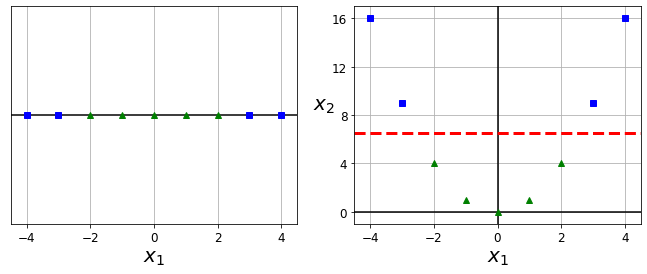

In [28]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

Para implementar esta idea usando Scikit-Learn, podemos crear un `Pipeline` conteniendo un transformador `PolynomialFeatures`, seguido de un `StandardScaler` y un `LinearSVC`. Probemos esto en el datasets de lunas: es un dataset de juguete para clasificación binaria en el cual los puntos de datos tiene la forma de dos semicírculos intercalados. Podemos generar este dataset usando la función `make_moons()`:

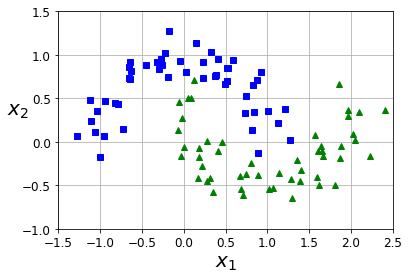

In [29]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [30]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

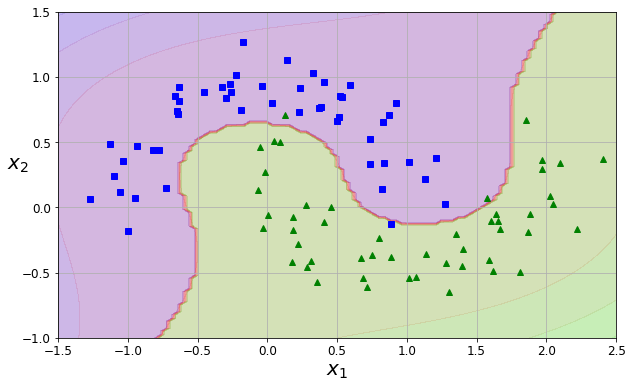

In [31]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plt.figure(figsize=(10, 6))
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5]);

## Kernel Polinomial

Añadir funciones polinómicas es sencillo de implementar y puede funcionar muy bien con todo tipo de algoritmos de Machine Learning (no solo SVMs), pero un polinomio de grado bajo no puede manejarse correctamente con datasets muy complejos y un polinomia de grado alto crea un alto número de características, haciendo el modelo demasiado lento.

Afortunadamente, cuando usamos SVMs podemos aplicar una técnica matemática casi milagrosa denominada truco del kernel (*kernel trick*), que explicaremos en un momento. Permite obtener el mismo resultado que si agregara muchas características polinómicas, incluso con polinomios de muy alto grado, sin tener que agregarlas realmente. Por tanto, no existe explosión combinatoria del número de características dado que realmente no añadimos ninguna característica. Este truco se implementa con la clase `SVC`. Probémoslo en el dataset de las lunas:

In [32]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

Este código entrena un clasificador SVM usando un kernel polinómico de 3º grado. Está representando a la izquierda en la siguiente gráfica. A la derecha está otro clasificador usando un kernel polinómico de grado 10º- Obviamente, si nuestro modelo está sobreajustado, podríamos querer disminuir el grado polinómico. Por el contrario, si no se ajusta podemos intentar incrementarlo. El hiperparámetro `coef0` controla cuánto es influenciado el modelo por el polinomio de alto grado vs el polinomio de bajo grado.

In [33]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

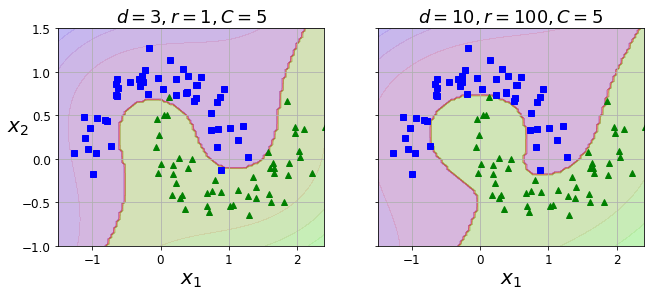

In [34]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("");

---
Un enfoque común para encontrar los valores correctos de hiperparámetros es usar grid search. A menudo es más rápido primero un grid search más grueso y luego ir afinando usando los mejores valores encontrados. Tener un buen sentido de lo que realmente hace cada hiperparámetro puede ayudarnos a buscar en la parte correcta del espacio de hiperparámetros.

---

## Añadir características similares

Otra técnica para abordar problemas no lineales es añadir caracterícticas calculadas usando una *función de similitud* que mide cuánto se parece cada instancia a una determinado punto de referencia particular. Por ejemplo, tomemos el dataset unidimensional tratado anteriormente y añadamos dos puntos de referencia en $x_1 = -2$ y $x_1 = 1$ (ver el siguiente gráfico de la izquierda). Después, definimos que la función de similitud sea la *Función Básica Radial* Gaussiana (RBF) con $\gamma = 0.3$:

***RBF Gaussiana***

![gaussian_rbf](images/ch05/gaussian_rbf.png)

Es una función en forma de campana que varía desde 0 (muy lejos del punto de referencia) hasta 1 (en el punto de referencia). Ahora estamos listos para calcular nuevas características. Por ejemplo, veamos la instancia $x_1 = -1$: está localizada a una distancia de 1 desde el primer punto de referencia y 2 desde el segundo punto de referencia. Por lo tanto, sus nuevas características son $x_2 = exp (-0.3 \times 1^2) \approx 0.74$ y $x_3 = exp (-0.3 \times 2^2) \approx 0.30$. La gráfica de la derecha muestra el dataset transformado (eliminando las características originales). Como podemos ver ahora son separables linealmente.

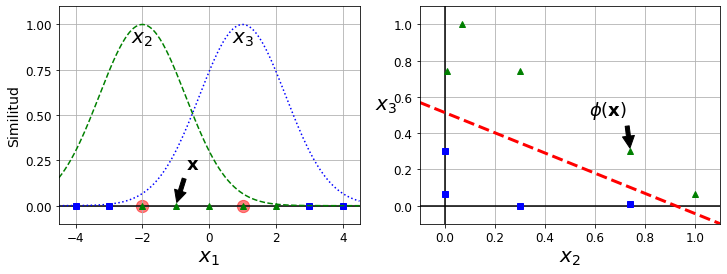

In [35]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similitud", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

In [36]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


Quizás nos preguntemos como seleccionar los puntos de referencia. El enfoque más simple es crear un punto de referencia en la localización de todas y cada una de las instancias del dataset. Esto creo muchas dimensiones y, por lo tanto, aumenta las posibilidades de que el conjunto de entrenamiento transformado sea linealmente separable. La desventaja es que un conjunto de entrenamiento con *m* instancias y *n* características se transforma en un conjunto de entrenamiento con *m* instancias y *m* características (asumiendo que eliminamos las características originales). Si nuestro conjunto de entrenamiento es muy grande, terminaremos con un numero de características igualmente grande.

## Kernel RBF Gaussiano

Al igual que el método de características polinomiales, el método de similitud de características puede ser útil con cualquier algoritmo de Machine Learning, pero puede ser computacionalmente costoso para calcular todas las características adicionales, especialmente en grandes conjuntos de entrenamiento. Sin embargo, una vez el truco del kernel hace su mágica SVM: posibilita obtener un resultado similar como si hubiera añadido muchas características similares, sin realmente tener que añadirlas. Intentemos el kernel RBF Gaussiano usando la clase `SVC`:

In [37]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

Este modelo está representado en la esquina inferior izquierda de la siguiente figura. Las otras gráficas muestran modelos entrenados con diferentes valores de hiperparámetros `gamma`($\gamma$) y `C`. Incrementar `gamma` hace que la curva en forma de campaña sea más estrecha (ver la gráfica de la izquiera de la figura anterior) y, como resultado, el rango de influencia de cada instancia es menor: el límite de decisión termina siendo más irregular. A la inversa, un valor pequeño de `gamma` hace la curva en forma de campana más ancha, por tanto las instancias tienen un mayor rango de influencia y el límite de decisión termina siendo más suave. Por tanto, $\gamma$ actua como un hiperparámetro de regularización: si nuestro modelo está sobreajustado debemos reducirlo y si está subajustado debemos incrementarlo (parecido al hiperparámetro `C`).

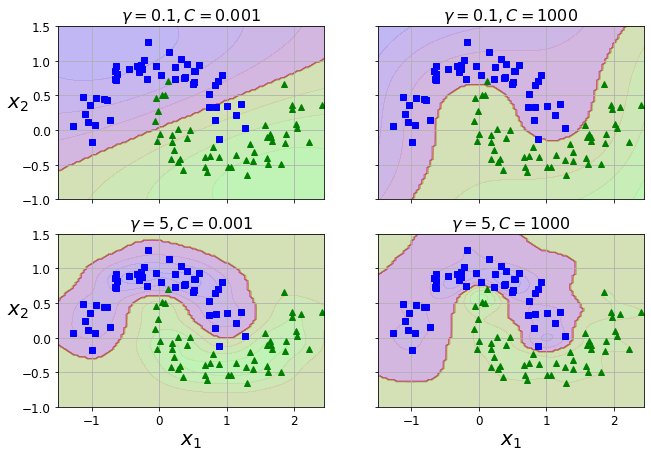

In [38]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")


Existen otros kernels pero se usan más raramente. Por ejemplo, algunos kernels está especializados en estructuras de datos específicas. Los *string kernels* se usan algunas veces cuando clasificamos documentos de texto o secuencias de ADN (por ejemplo, usando el *string subsequence kernel* o kernels basados en la *distancia Levenshtein*).

---
Con tantos kernels para elegir ¿cómo podemos decidir cuál usar? Como regla a recordar, siempre debemos intentar primer el kernel lineal (recordemos que `LinearSVC` es mucho más rápido que `SVC(kernel="linear")`), especialmente si el conjunto de entrenamiento es muy grande o si tiene muchas características. Si el conjunto de entrenamiento no es muy grande, deberíamos probar también el kernel RBF Gaussiano; funciona bien en la mayoría de los casos. Luego, si tenemos tiempo libre y poder de cómputo, podemos también experimentar con otros cuantos kernels usando validación cruzada y grid search, especialmente si hay kernels especializados para las estructuras de datos de nuestro conjunto de entrenamiento.

---

## Complejidad computacional

La clase `LinearSVC` está basada en la librería *liblinear*, que implementa un [algoritmo optimizado](https://www.csie.ntu.edu.tw/~cjlin/papers/cddual.pdf) para la SVM lineal. No soporta el truco del kernel, pero escala casi linealmente con el número de instancias de entrenamiento y el número de características: la complejidad de su tiempo de entrenamiento es aproximadamente $O(m \times n)$.

El algorirmo lleva más tiempo si se requiere una alta precisión. Esto se controla con el hiperparámetro de tolerancia $\epsilon$ (llamado `tol`en Scikit-Learn). En la mayorías de las tareas de clasificación, la tolerancia por defecto está bien.

La clase `SVC` está basada en la librería *libsvm*, que implementa [un algoritmo](https://homl.info/14) que admite el truco del kernel. La complejidad del tiempo de entrenamiento está normalmente entre $O(m^2 \times n)$ y $O(m^3 \times n)$. Desafortunadamente esto significa que se vuelve terriblemente lento cuando aumenta el número de instancias de entrenamiento (es decir, cientos de miles de instancias). Este algoritmo es perfecto para conjuntos de entrenamiento complejos, pero pequeños o medios. Sin embargo, escala bien con el número de características, especialmente con *características dispersas* (es decir, cuando cada instancia tiene pocas características que nos son cero). En este caso, el algoritmo escala aproximadamente con el promedio del número de características no cero por instancia. La siguiente figura compara las clases de clasificación SVM de Scikit-Learn.

***Comparativa de las clases de Scikit-Learn de clasificación SVM***

![svm_comparasion](images/ch05/svm_comparasion.png)